In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [5]:
df1 = df[['Name', 'Age', 'Nationality', 'Value', 'Wage', 'Preferred Foot', 'Height', 'Weight', 'Position', 'Overall','Joined','Contract Valid Until','Release Clause','International Reputation']]
df1.head()

,Name,Age,Nationality,Value,Wage,Preferred Foot,Height,Weight,Position,Overall,Joined,Contract Valid Until,Release Clause,International Reputation
0,L. Messi,31,Argentina,€110.5M,€565K,Left,5'7,159lbs,RF,94,"Jul 1, 2004",2021,€226.5M,5.0
1,Cristiano Ronaldo,33,Portugal,€77M,€405K,Right,6'2,183lbs,ST,94,"Jul 10, 2018",2022,€127.1M,5.0
2,Neymar Jr,26,Brazil,€118.5M,€290K,Right,5'9,150lbs,LW,92,"Aug 3, 2017",2022,€228.1M,5.0
3,De Gea,27,Spain,€72M,€260K,Right,6'4,168lbs,GK,91,"Jul 1, 2011",2020,€138.6M,4.0
4,K. De Bruyne,27,Belgium,€102M,€355K,Right,5'11,154lbs,RCM,91,"Aug 30, 2015",2023,€196.4M,4.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Value                     18207 non-null  object 
 4   Wage                      18207 non-null  object 
 5   Preferred Foot            18159 non-null  object 
 6   Height                    18159 non-null  object 
 7   Weight                    18159 non-null  object 
 8   Position                  18147 non-null  object 
 9   Overall                   18207 non-null  int64  
 10  Joined                    16654 non-null  object 
 11  Contract Valid Until      17918 non-null  object 
 12  Release Clause            16643 non-null  object 
 13  International Reputation  18159 non-null  float64
dtypes: flo

In [7]:
def convert(item):
    if 'M' in item:
        item=float(item.split('€')[1].split('M')[0])*1000000
    elif 'K' in item:
        item=float(item.split('€')[1].split('K')[0])*1000
    else: 
        item=float(item.split('€')[1])
#     item=np.float64(item)
    return item

df1['Value'] = df1['Value'].apply(convert)
df1['Wage'] = df1['Wage'].apply(convert)

<ipython-input-7-28b43abf1836>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Value'] = df1['Value'].apply(convert)
<ipython-input-7-28b43abf1836>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Wage'] = df1['Wage'].apply(convert)


In [8]:
RC_mean=df1['Release Clause'].dropna().apply(convert).mean()
RC_mean="€"+str(RC_mean)
df1['Release Clause']=df1['Release Clause'].fillna(value=RC_mean).apply(convert)

<ipython-input-8-36f3e88c4f28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Release Clause']=df1['Release Clause'].fillna(value=RC_mean).apply(convert)


In [9]:
regex_pat = re.compile(r'lbs', flags=re.IGNORECASE)
df1['Weight']=df1['Weight'].str.replace(regex_pat, '')
df1['Weight']=df1['Weight'].astype(float)

<ipython-input-9-6118c8461a62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Weight']=df1['Weight'].str.replace(regex_pat, '')
<ipython-input-9-6118c8461a62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Weight']=df1['Weight'].astype(float)


In [10]:
df1['Weight']=df1['Weight'].fillna(df1['Weight'].mean())

<ipython-input-10-4314409511c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Weight']=df1['Weight'].fillna(df1['Weight'].mean())


In [11]:
Height_cm = []
for i in list(df1['Height'].values):
    try:
        Height_cm.append((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54)
    except(ValueError):
        Height_cm.append(np.nan)
        
df1['Height_cm'] = Height_cm

<ipython-input-11-2d58486334c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Height_cm'] = Height_cm


In [12]:
df1['Height']=df1['Height_cm']

<ipython-input-12-1bc62dc9c31f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Height']=df1['Height_cm']


In [13]:
df1['Height']=df1['Weight'].fillna(df1['Height'].mean())

<ipython-input-13-2255ecf74384>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Height']=df1['Weight'].fillna(df1['Height'].mean())


In [14]:
df1['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

<ipython-input-14-8f337294bfcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])


In [15]:
df1['Contract Valid Until']=df1['Contract Valid Until'].fillna(df1['Contract Valid Until'].mean())

<ipython-input-15-9b0af47b2041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Contract Valid Until']=df1['Contract Valid Until'].fillna(df1['Contract Valid Until'].mean())


In [16]:
df1['Joined'] = df1['Joined'].str.rsplit(',').str[-1]

<ipython-input-16-255874f8e885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Joined'] = df1['Joined'].str.rsplit(',').str[-1]


In [17]:
df1['Joined']=df1['Joined'].astype(float)
df1['Joined'] = df1['Joined'].fillna(df1['Joined'].mean())

<ipython-input-17-0002006cfb5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Joined']=df1['Joined'].astype(float)
<ipython-input-17-0002006cfb5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Joined'] = df1['Joined'].fillna(df1['Joined'].mean())


In [18]:
df1['Joined']=df1['Joined'].astype(int)

<ipython-input-18-b26d5de771cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Joined']=df1['Joined'].astype(int)


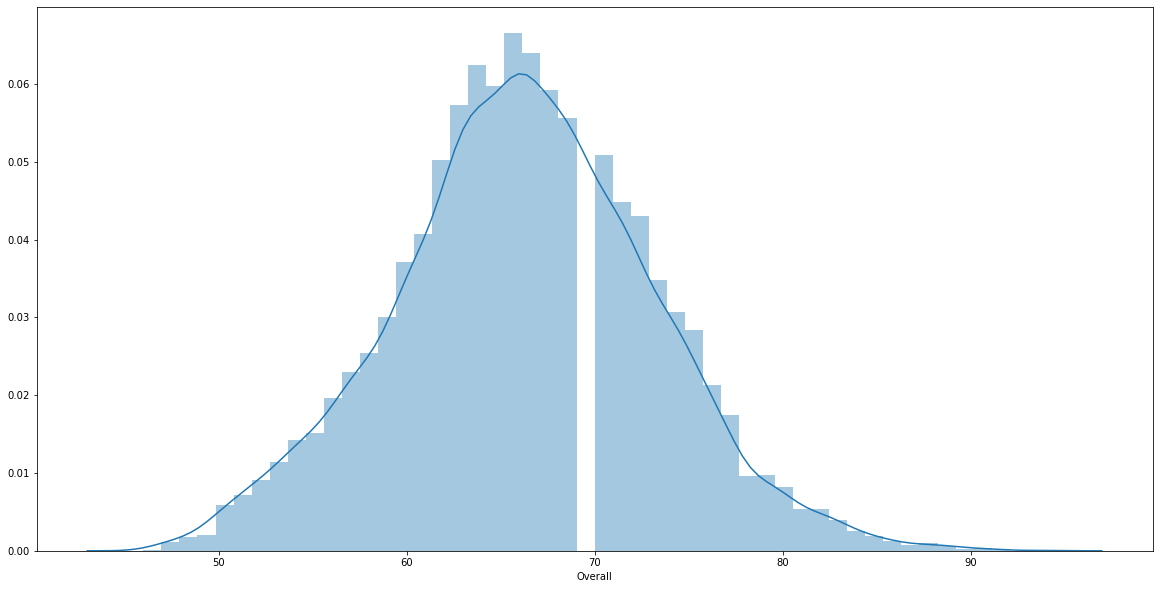

In [40]:
# distribution of Overall rating for all players. 
plt.figure(figsize=(20,10))
sns.distplot(df1['Overall'])
plt.savefig('Overall_rating_dist.png')

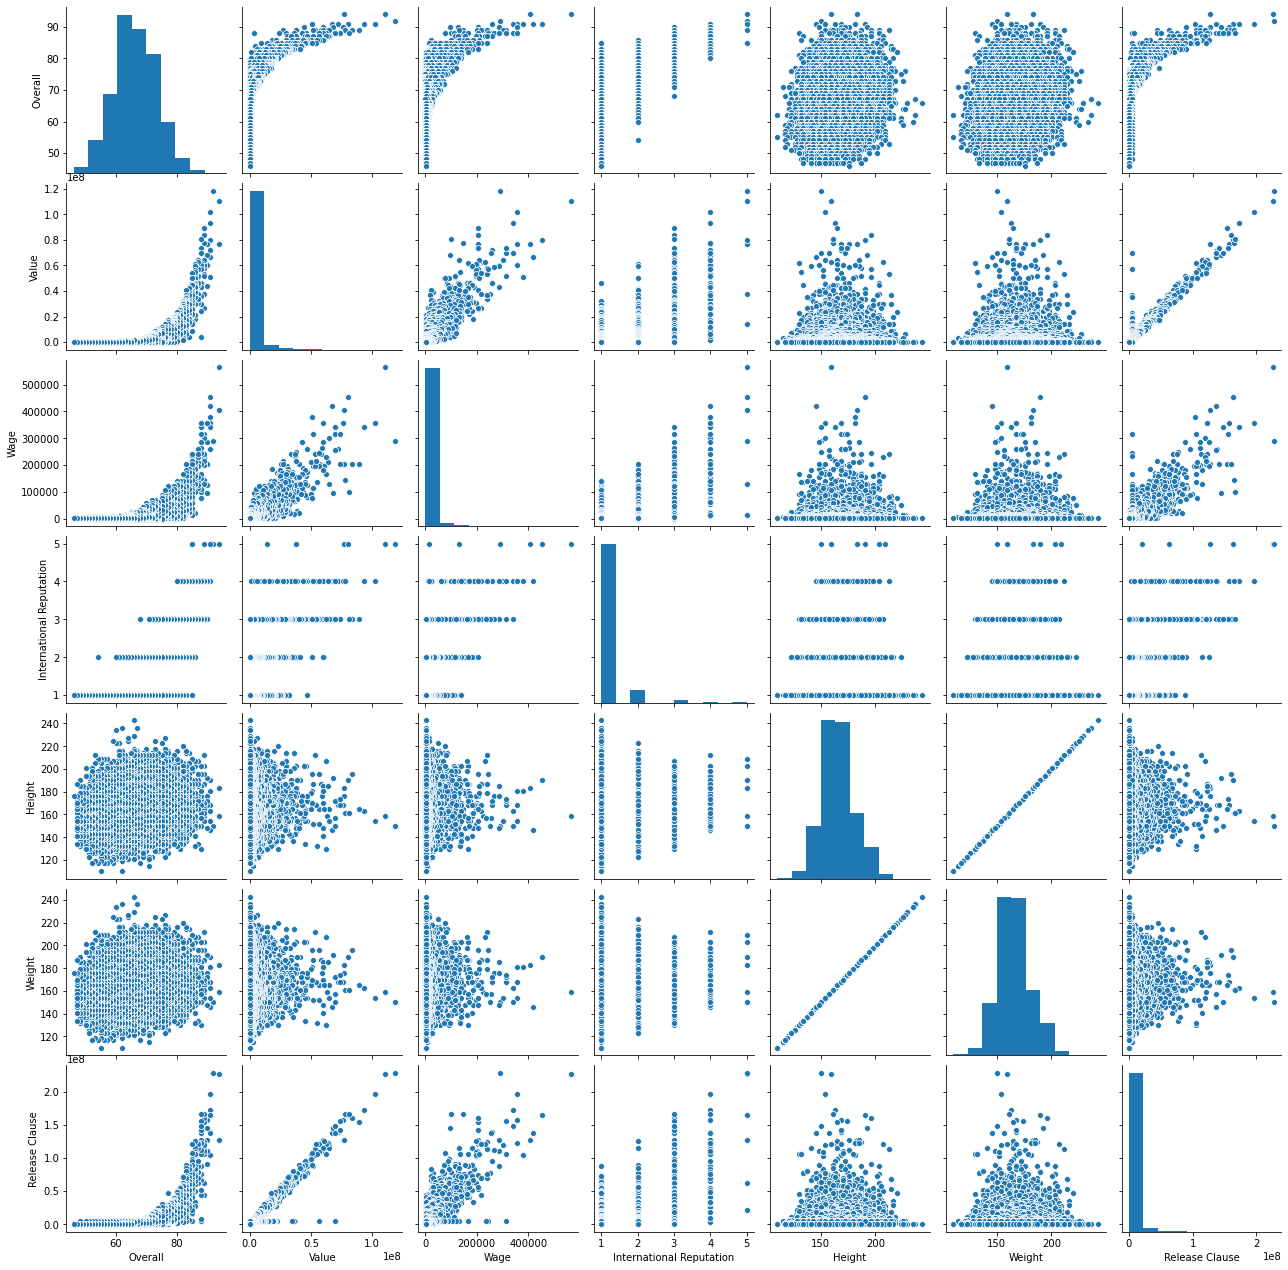

In [41]:
# pair plots for the following variables:
#  Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
df2 = df1[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']]

sns.pairplot(df2)
plt.savefig('pairplot.png')

In [20]:
start_date = "2020-01-01"
end_date = "2020-12-31"

after_start_date = df1['Contract Valid Until'] >= start_date
before_end_date = df1['Contract Valid Until'] <= end_date
between_two_dates = after_start_date & before_end_date
fd = df1.loc[between_two_dates]
fd

,Name,Age,Nationality,Value,Wage,Preferred Foot,Height,Weight,Position,Overall,Joined,Contract Valid Until,Release Clause,International Reputation,Height_cm
3,De Gea,27,Spain,72000000.0,260000.0,Right,168.0,168.0,GK,91,2011,2020-01-01,138600000.0,4.0,193.04
5,E. Hazard,27,Belgium,93000000.0,340000.0,Right,163.0,163.0,LF,91,2012,2020-01-01,172100000.0,4.0,172.72
6,L. Modrić,32,Croatia,67000000.0,420000.0,Right,146.0,146.0,RCM,91,2012,2020-01-01,137400000.0,4.0,172.72
8,Sergio Ramos,32,Spain,51000000.0,380000.0,Right,181.0,181.0,RCB,91,2005,2020-01-01,104600000.0,4.0,182.88
13,David Silva,32,Spain,60000000.0,285000.0,Left,148.0,148.0,LCM,90,2010,2020-01-01,111000000.0,4.0,172.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18166,N. Ayéva,16,Sweden,70000.0,1000.0,Right,154.0,154.0,ST,48,2018,2020-01-01,158000.0,1.0,177.80
18179,J. Williams,17,England,50000.0,1000.0,Right,163.0,163.0,CB,48,2018,2020-01-01,119000.0,1.0,187.96
18187,C. Ehlich,19,Germany,40000.0,1000.0,Right,161.0,161.0,RB,47,2017,2020-01-01,66000.0,1.0,177.80
18189,A. Kaltner,18,Germany,60000.0,1000.0,Right,165.0,165.0,ST,47,2017,2020-01-01,125000.0,1.0,177.80


In [21]:
df3 = fd.sort_values(by='Overall', ascending=False).head(20)

In [22]:
# the average wage for this set of players 
df3['Wage'].mean()

205450.0

In [23]:
# the average age
df3['Age'].mean()

30.65

In [24]:
# correlation between the Overall rating and Value for these players
df3['Overall'].corr(df3['Value'])

0.7867166042074152

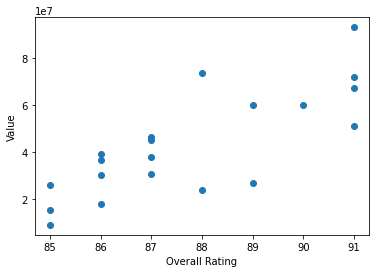

In [43]:
plt.scatter(df3['Overall'],df3['Value'])
plt.xlabel('Overall Rating')
plt.ylabel('Value')
plt.savefig('corr_scatter.png')

In [25]:
#4.	Generate tables containing the top 5 players by Overall rating for each unique position.
df4 = fd.sort_values(by=['Position','Overall'], ascending=False)


In [26]:
df5 = df4.groupby('Position').head(5)


In [27]:
df5.dropna()

,Name,Age,Nationality,Value,Wage,Preferred Foot,Height,Weight,Position,Overall,Joined,Contract Valid Until,Release Clause,International Reputation,Height_cm
98,E. Džeko,32,Bosnia Herzegovina,30500000.0,115000.0,Right,185.0,185.0,ST,85,2015,2020-01-01,51900000.0,3.0,193.04
139,M. Mandžukić,32,Croatia,25000000.0,160000.0,Right,187.0,187.0,ST,84,2015,2020-01-01,41300000.0,3.0,190.50
145,Jonas,34,Brazil,16500000.0,25000.0,Right,163.0,163.0,ST,84,2014,2020-01-01,33000000.0,3.0,180.34
179,S. Gnabry,22,Germany,34500000.0,85000.0,Right,165.0,165.0,ST,83,2017,2020-01-01,59500000.0,2.0,175.26
404,B. Gomis,32,France,14000000.0,56000.0,Right,170.0,170.0,ST,81,2018,2020-01-01,23800000.0,3.0,182.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,C. Eriksen,26,Denmark,73500000.0,205000.0,Right,168.0,168.0,CAM,88,2013,2020-01-01,141500000.0,3.0,180.34
80,N. Fekir,24,France,50000000.0,92000.0,Left,165.0,165.0,CAM,85,2013,2020-01-01,98800000.0,3.0,172.72
263,Rafinha,25,Brazil,29500000.0,165000.0,Left,157.0,157.0,CAM,82,2013,2020-01-01,62700000.0,2.0,175.26
379,S. Kagawa,29,Japan,17500000.0,65000.0,Right,150.0,150.0,CAM,81,2014,2020-01-01,29800000.0,3.0,175.26


In [28]:
# a)	Are there any players appearing in more than one Table. Please point out such players.
x = df3.merge(df5, how = 'inner' ,indicator=False)
x

,Name,Age,Nationality,Value,Wage,Preferred Foot,Height,Weight,Position,Overall,Joined,Contract Valid Until,Release Clause,International Reputation,Height_cm
0,De Gea,27,Spain,72000000.0,260000.0,Right,168.0,168.0,GK,91,2011,2020-01-01,138600000.0,4.0,193.04
1,L. Modrić,32,Croatia,67000000.0,420000.0,Right,146.0,146.0,RCM,91,2012,2020-01-01,137400000.0,4.0,172.72
2,Sergio Ramos,32,Spain,51000000.0,380000.0,Right,181.0,181.0,RCB,91,2005,2020-01-01,104600000.0,4.0,182.88
3,E. Hazard,27,Belgium,93000000.0,340000.0,Right,163.0,163.0,LF,91,2012,2020-01-01,172100000.0,4.0,172.72
4,David Silva,32,Spain,60000000.0,285000.0,Left,148.0,148.0,LCM,90,2010,2020-01-01,111000000.0,4.0,172.72
5,E. Cavani,31,Uruguay,60000000.0,200000.0,Right,170.0,170.0,LS,89,2013,2020-01-01,111000000.0,4.0,185.42
6,G. Chiellini,33,Italy,27000000.0,215000.0,Left,187.0,187.0,LCB,89,2005,2020-01-01,44600000.0,4.0,187.96
7,C. Eriksen,26,Denmark,73500000.0,205000.0,Right,168.0,168.0,CAM,88,2013,2020-01-01,141500000.0,3.0,180.34
8,Thiago Silva,33,Brazil,24000000.0,165000.0,Right,181.0,181.0,RCB,88,2012,2020-01-01,44400000.0,4.0,182.88
9,D. Mertens,31,Belgium,45000000.0,135000.0,Right,134.0,134.0,RF,87,2013,2020-01-01,76500000.0,3.0,170.18


In [30]:
# b)	What is the average wage one can expect to pay for the top 5 in every position?
wm = df5.groupby('Position')['Wage'].mean()
wm

Position
CAM    123400.000000
CB      95200.000000
CDM    105600.000000
CF       8600.000000
CM     102400.000000
GK     130400.000000
LAM      6000.000000
LB     126000.000000
LCB     68000.000000
LCM     98200.000000
LDM     42800.000000
LF      94000.000000
LM      63200.000000
LS      61600.000000
LW      43000.000000
LWB     32000.000000
RAM     58666.666667
RB      48200.000000
RCB    159000.000000
RCM    132400.000000
RDM     44600.000000
RF      74500.000000
RM      64400.000000
RS      45200.000000
RW      88800.000000
RWB     22200.000000
ST      88200.000000
Name: Wage, dtype: float64

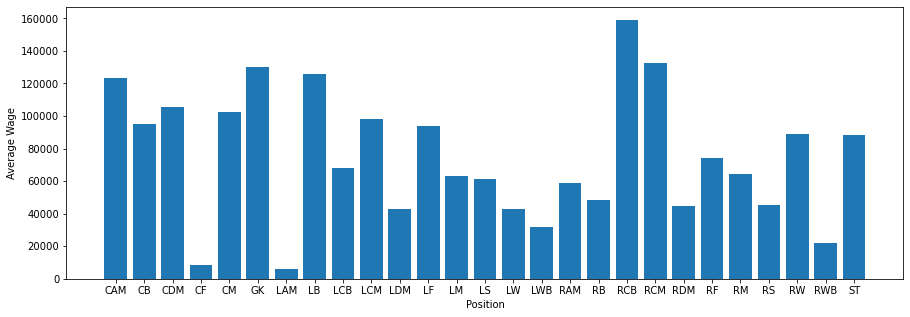

In [44]:
fig = plt.figure(figsize = (15, 5)) 
plt.bar(wm.index, wm.values)
plt.xlabel('Position')
plt.ylabel('Average Wage')
plt.savefig('avg_wage_bar_pos.png')